# Imports and Prepare Data

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import imageio
from random import randint

2024-11-24 17:52:55.257185: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732458175.323627    5579 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732458175.343635    5579 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-24 17:52:55.519215: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
x_train = np.load('../data/mnist/x_train.npy')
y_train = np.load('../data/mnist/y_train.npy')
x_test  = np.load('../data/mnist/x_test.npy')
y_test  = np.load('../data/mnist/y_test.npy')

assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

# normalize
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

### Predition Function

In [9]:
def predict_test_data(model, show_image=True):
    ims_idx = []
    for i in range(10):
        x = randint(0, 9999)
        ims_idx.append(x)

    results = []
    msgs = []
    r = str()
    msg = ''

    for i in ims_idx:
        results.append(model.predict(x_test[i].reshape(1, 28, 28, 1)))

    for i in range(len(ims_idx)):
        if str(np.argmax(results[i])) == str(y_test[ims_idx[i]]):
            msg = "Correct " + str(np.argmax(results[i]))
            r += 'T '
        else:
            msg = "Wrong " + str(np.argmax(results[i])) + " - " + str(y_test[ims_idx[i]])
            r += 'F ' 

        msgs.append(msg)
        msg = ''
        
    print(r)
    if show_image:
        fig, axs = plt.subplots(3, 3)
        j, z = 0, 0
        for i in range(9):
            axs[j][z].text(0, 0, msgs[i], bbox={'facecolor': 'white', 'pad': 1})
            axs[j][z].imshow(x_test[ims_idx[i]].reshape(28, 28), cmap='binary')
            if z == 2:
                j += 1
                z = 0
            else:
                z += 1

        plt.show()

    return r

def predict_real_data(model, show_image=True):
    ls = os.listdir('../img/')
    ims = [] 
    idx = []
    r = str()
    msgs = []

    for i in ls:
        if i.endswith('.png'):
            ims.append(imageio.imread('../img/' + i, mode='F'))  
            idx.append(i[0])

    for i in range(len(ims)):
        result = np.argmax(model.predict(ims[i].reshape(1, 28, 28, 1)))

        if str(result) == str(idx[i]):
            msg = "Correct " + str(result)
            r += 'T '
        else:
            msg = "Wrong " + str(result) + " - " + str(idx[i])
            r += 'F '

        msgs.append(msg)

    print(r)

    if show_image:
        fig, axs = plt.subplots(3, 3)
        j, z = 0, 0
        for i in range(9):
            axs[j, z].text(0, 0, msgs[i], bbox={'facecolor': 'white', 'pad': 1})
            axs[j][z].imshow(ims[i], cmap='grey')
            if z == 2:
                j += 1
                z = 0
            else:
                z += 1

        plt.show()
        
    return r

# LSTM

### Create Model

In [3]:
PATH = '../saved_weights/LSTM_model/' + 'lstm_1.weights.h5'

model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(128, input_shape=(28, 28), activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


I0000 00:00:1732458179.362237    5579 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4730 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5
/home/devhamidh/Desktop/projekt/NN_MNIST/venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Complie

In [4]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │        80,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,674 (319.04 KB)

 Trainable params: 81,674 (319.04 KB)

 Non-trainable params: 0 (0.00 B)

### Train

In [5]:
model.fit(x_train, y_train, epochs=5, validation_split=0.2, batch_size=64)

Epoch 1/5


I0000 00:00:1732458185.709420    5868 service.cc:148] XLA service 0x77d2440033d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732458185.709622    5868 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2024-11-24 17:53:05.758118: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1732458185.907930    5868 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-11-24 17:53:06.359220: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:930] The NVIDIA driver's CUDA version is 12.4 which is older than the PTX compiler version 12.5.82. Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


 73/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2380 - loss: 2.1829

I0000 00:00:1732458186.784043    5868 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5640 - loss: 1.3561 - val_accuracy: 0.9414 - val_loss: 0.1913
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9426 - loss: 0.1847 - val_accuracy: 0.9671 - val_loss: 0.1175
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9655 - loss: 0.1111 - val_accuracy: 0.9593 - val_loss: 0.1342
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9718 - loss: 0.0882 - val_accuracy: 0.9783 - val_loss: 0.0785
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9796 - loss: 0.0686 - val_accuracy: 0.9797 - val_loss: 0.0663


In [6]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9797 - loss: 0.0646


[0.0586802177131176, 0.9819999933242798]

### Save and load

In [13]:
model.save_weights(PATH)

In [7]:
model.load_weights(PATH)

/home/devhamidh/Desktop/projekt/NN_MNIST/venv/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 12 variables whereas the saved optimizer has 0 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


### Predition

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
F F F T F F F F F F 


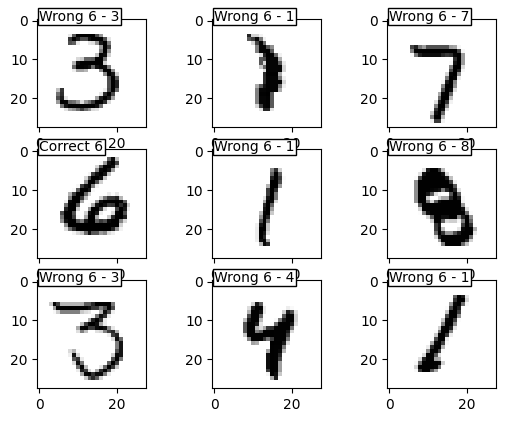

In [10]:
r = predict_test_data(model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


/tmp/ipykernel_9851/292622765.py:52: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  ims.append(imageio.imread('img/' + i, mode='F'))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
F F F F F T F F F 


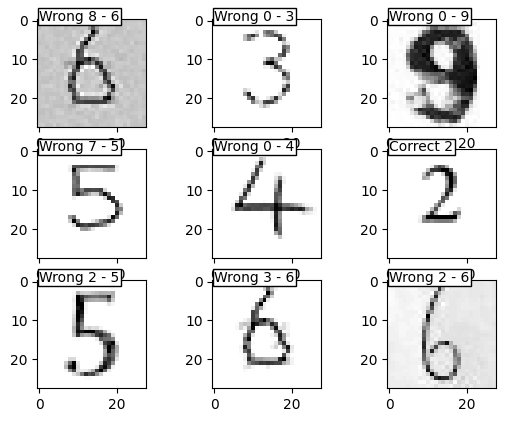

In [ ]:
r = predict_real_data(model)